# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

- This script performs data loading, preprocessing, scaling, and clustering on the California Housing dataset.
- It applies PCA for dimension reduction, followed by clustering using the BIRCH algorithm with specified parameters.
- It also includes visualization of the clustering results using a scatter plot based on geographical data, with points colored according to cluster labels to provide a visual assessment of the spatial distribution of clusters.

# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

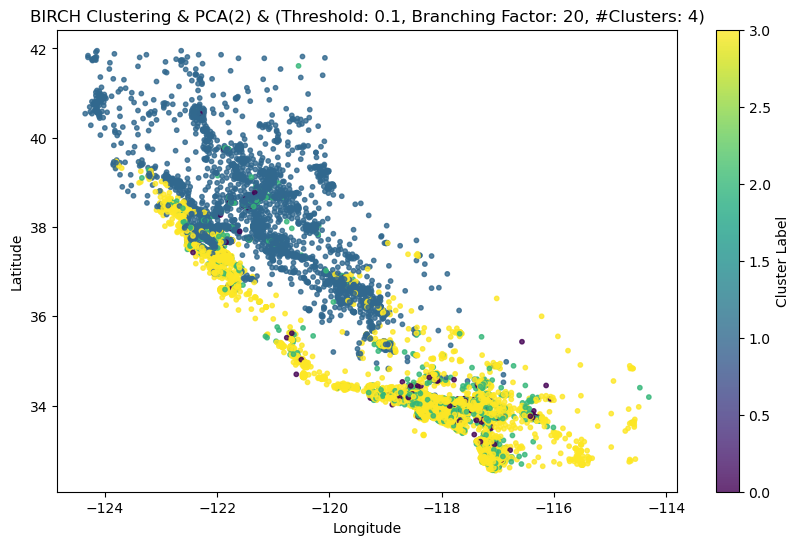

In [3]:
pca = PCA(n_components=2)
housing_pca = pca.fit_transform(housing_scaled)

birch_model = Birch(threshold=0.1, branching_factor=20, n_clusters=4)
birch_model.fit(housing_pca)

cluster_labels = birch_model.fit_predict(housing_pca)


plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=cluster_labels, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('BIRCH Clustering & PCA(2) & (Threshold: 0.1, Branching Factor: 20, #Clusters: 4)')
plt.show()
